## King County - House Price

In this project, I aimed to estimate house prices.

#  Column Description 
<br>
<b>id </b> unique ID for a house <br>
<b>date </b> Date day house was sold<br>
<b>price </b> Price is prediction target<br>
<b>bedrooms </b> Number of bedrooms<br>
<b>bathrooms </b> Number of bathrooms<br>
<b>sqft_living </b> square footage of the home<br>
<b>sqft_lot </b> square footage of the lot<br>
<b>floors </b> Total floors (levels) in house<br>
<b>waterfront </b> Whether house has a view to a waterfront<br>
<b>view </b> Number of times house has been viewed<br>
<b>condition </b> How good the condition is (overall)<br>
<b>grade </b> overall grade given to the housing unit, based on King County grading system<br>
<b>sqft_above </b> square footage of house (apart from basement)<br>
<b>sqft_basement </b> square footage of the basement<br>
<b>yr_built </b> Year when house was built<br>
<b>yr_renovated </b> Year when house was renovated<br>
<b>zipcode </b> zip code in which house is located<br>
<b>lat </b> Latitude coordinate<br>
<b>long </b> Longitude coordinate<br>
<b>sqft_living15 </b> The square footage of interior housing living space for the nearest 15 neighbors<br>
<b>sqft_lot15 </b> The square footage of the land lots of the nearest 15 neighbors<br>

In [641]:
import pandas as pd #data read and analysis package
import matplotlib.pyplot as plt #chart drawing
import seaborn as sns #making statistical graphics
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [686]:
df= pd.read_csv("kc_house_data.csv") #data is loading,reading

## EDA Exploratory Data Analysis

In [687]:
df.head() #

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [688]:
df.sample(50) #randomly returns 5 records

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20868,3026059361,20150417T000000,479000.0,2,2.50,1741,1439,2.0,0,0,...,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454
20547,3278606050,20150401T000000,362500.0,3,3.50,1710,2212,2.0,0,0,...,7,1400,310,2013,0,98126,47.5459,-122.368,1580,2212
13904,3348401490,20140630T000000,265000.0,2,2.00,1860,10856,1.0,0,0,...,8,1260,600,1952,0,98178,47.4989,-122.265,1250,10008
11940,537000416,20150429T000000,250000.0,3,2.00,1680,7900,2.0,0,0,...,7,1680,0,1953,0,98003,47.3255,-122.305,1250,15600
13707,1138000410,20140915T000000,307500.0,3,1.00,980,6530,1.0,0,0,...,7,980,0,1969,0,98034,47.7133,-122.213,1220,6723
9897,123039346,20150430T000000,335000.0,3,1.75,1260,17000,1.0,0,0,...,7,1260,0,1994,0,98146,47.5114,-122.361,1540,7213
17409,1951600250,20150406T000000,135000.0,3,1.00,830,9600,1.0,0,0,...,7,830,0,1959,0,98032,47.3698,-122.297,1240,9198
2105,3291800510,20140610T000000,310000.0,3,1.75,1420,7650,1.0,0,0,...,7,1100,320,1984,0,98056,47.4892,-122.182,1810,7650
13106,3709500180,20140527T000000,445830.0,3,2.50,1870,5449,2.0,0,0,...,8,1870,0,2003,0,98011,47.7557,-122.220,2000,7687
5440,7215720250,20141210T000000,693000.0,4,2.50,3160,13063,2.0,0,0,...,10,3160,0,1999,0,98075,47.5996,-122.021,3350,14213


In [689]:
df.shape #returns the size of the dataframe

(21613, 21)

In [690]:
df[df['price']> 60000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:>

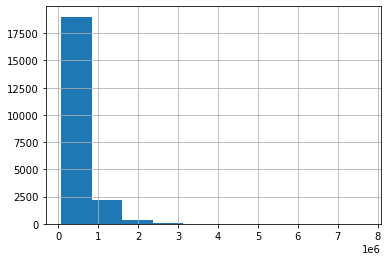

In [691]:
df['price'].hist() #histogram distribution

In [648]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [692]:
#for example
#price 5.400881e+05 +3*3.671272e+05 =1641469
#bedrooms 3.370842 + 3*0.930062 =6.161028
#bathrooms 2.114757 + 3*0.770163 =4.425246
#sqft_living  2079.899736 +3*918.440897  = 4835.222427
#sqft_lot 1.510697e+04 + 3*4.142051e+04 =139368.5

In [693]:
df = df[df.price < 1641470]
df = df[df.bedrooms < 6.17]
df = df[df.bathrooms < 4.5]
df = df[df.sqft_living < 4836]
df = df[df.sqft_lot < 139369]


In [694]:
#df= df[df["bedrooms"]< 6.17]

In [695]:
df.info() #is there any empty data?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20655 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20655 non-null  int64  
 1   date           20655 non-null  object 
 2   price          20655 non-null  float64
 3   bedrooms       20655 non-null  int64  
 4   bathrooms      20655 non-null  float64
 5   sqft_living    20655 non-null  int64  
 6   sqft_lot       20655 non-null  int64  
 7   floors         20655 non-null  float64
 8   waterfront     20655 non-null  int64  
 9   view           20655 non-null  int64  
 10  condition      20655 non-null  int64  
 11  grade          20655 non-null  int64  
 12  sqft_above     20655 non-null  int64  
 13  sqft_basement  20655 non-null  int64  
 14  yr_built       20655 non-null  int64  
 15  yr_renovated   20655 non-null  int64  
 16  zipcode        20655 non-null  int64  
 17  lat            20655 non-null  float64
 18  long  

In [696]:
list(df.columns) #all columns

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [697]:
df['zipcode'] = df['zipcode'].astype('category') #we converted to string

#df=df[df['bathrooms']> 0.9]

#df['floors'] = df['floors'].astype('int')


In [698]:
df.info() #dtype information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20655 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20655 non-null  int64   
 1   date           20655 non-null  object  
 2   price          20655 non-null  float64 
 3   bedrooms       20655 non-null  int64   
 4   bathrooms      20655 non-null  float64 
 5   sqft_living    20655 non-null  int64   
 6   sqft_lot       20655 non-null  int64   
 7   floors         20655 non-null  float64 
 8   waterfront     20655 non-null  int64   
 9   view           20655 non-null  int64   
 10  condition      20655 non-null  int64   
 11  grade          20655 non-null  int64   
 12  sqft_above     20655 non-null  int64   
 13  sqft_basement  20655 non-null  int64   
 14  yr_built       20655 non-null  int64   
 15  yr_renovated   20655 non-null  int64   
 16  zipcode        20655 non-null  category
 17  lat            20655 non-null  

In [699]:
df.isnull().sum() #Are there any blanks values?

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [700]:
df.corr() #correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.002963,0.007922,0.024912,0.011084,-0.135479,0.026641,0.007432,0.024849,-0.027599,0.028585,0.016027,-0.007319,0.030242,-0.016614,-0.005271,0.040531,0.013367,-0.116363
price,0.002963,1.000000,0.308696,0.471330,0.648078,0.101884,0.266529,0.101514,0.313154,0.047535,0.656841,0.541862,0.268047,0.042871,0.110562,0.400855,0.026199,0.580312,0.058955
bedrooms,0.007922,0.308696,1.000000,0.502280,0.601225,0.084410,0.161350,-0.039577,0.048384,0.029060,0.349496,0.480635,0.287498,0.171377,0.006071,-0.026561,0.146722,0.397788,0.042946
bathrooms,0.024912,0.471330,0.502280,1.000000,0.718780,0.068924,0.505272,0.002896,0.119807,-0.128836,0.630109,0.637609,0.232785,0.538741,0.035141,0.008657,0.235470,0.540854,0.045476
sqft_living,0.011084,0.648078,0.601225,0.718780,1.000000,0.230148,0.344846,0.014656,0.204966,-0.059950,0.728303,0.851779,0.386004,0.341614,0.037030,0.039858,0.257695,0.752978,0.163337
sqft_lot,-0.135479,0.101884,0.084410,0.068924,0.230148,1.000000,-0.085604,0.054843,0.057972,0.030705,0.140268,0.221608,0.043809,0.038836,0.017717,-0.079060,0.283739,0.264078,0.734888
floors,0.026641,0.266529,0.161350,0.505272,0.344846,-0.085604,1.000000,0.001518,-0.001828,-0.270873,0.454332,0.534098,-0.290128,0.500012,0.001458,0.043838,0.127363,0.265976,-0.067069
waterfront,0.007432,0.101514,-0.039577,0.002896,0.014656,0.054843,0.001518,1.000000,0.332907,0.012831,0.008219,0.002346,0.023508,-0.039763,0.082125,-0.037154,-0.054913,0.025528,0.058978
view,0.024849,0.313154,0.048384,0.119807,0.204966,0.057972,-0.001828,0.332907,1.000000,0.040616,0.181217,0.087245,0.232909,-0.071213,0.092963,0.002445,-0.100299,0.224285,0.044334
condition,-0.027599,0.047535,0.029060,-0.128836,-0.059950,0.030705,-0.270873,0.012831,0.040616,1.000000,-0.154443,-0.169832,0.185989,-0.356256,-0.061702,-0.013705,-0.098372,-0.101513,0.031368


In [701]:
#corr sorting from smallest to largest,removing the negative values
abs(df.corr()['price']).sort_values(ascending=False) 
#abs absolute value
# include values greater than 20% in x

price            1.000000
grade            0.656841
sqft_living      0.648078
sqft_living15    0.580312
sqft_above       0.541862
bathrooms        0.471330
lat              0.400855
view             0.313154
bedrooms         0.308696
sqft_basement    0.268047
floors           0.266529
yr_renovated     0.110562
sqft_lot         0.101884
waterfront       0.101514
sqft_lot15       0.058955
condition        0.047535
yr_built         0.042871
long             0.026199
id               0.002963
Name: price, dtype: float64

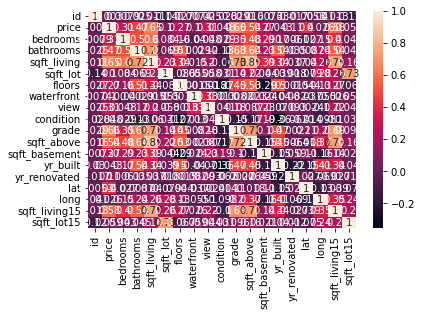

In [702]:
sns.heatmap(df.corr(),annot=True);

In [660]:
#İf the correlation is greater than 90% the data has probably repeated itself
# in another form.Since the effect will be less,it does not take less than 20%

In [661]:
#sns.pairplot(df)

In [662]:
#Modelling

In [703]:
x=df[["sqft_living","sqft_lot","grade","sqft_above","sqft_living15","bathrooms","waterfront","view","sqft_basement","bedrooms","floors","zipcode","condition"]]

In [704]:
x

,sqft_living,sqft_lot,grade,sqft_above,sqft_living15,bathrooms,waterfront,view,sqft_basement,bedrooms,floors,zipcode,condition
0,1180,5650,7,1180,1340,1.00,0,0,0,3,1.0,98178,3
1,2570,7242,7,2170,1690,2.25,0,0,400,3,2.0,98125,3
2,770,10000,6,770,2720,1.00,0,0,0,2,1.0,98028,3
3,1960,5000,7,1050,1360,3.00,0,0,910,4,1.0,98136,5
4,1680,8080,8,1680,1800,2.00,0,0,0,3,1.0,98074,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,1131,8,1530,1530,2.50,0,0,0,3,3.0,98103,3
21609,2310,5813,8,2310,1830,2.50,0,0,0,4,2.0,98146,3
21610,1020,1350,7,1020,1020,0.75,0,0,0,2,2.0,98144,3
21611,1600,2388,8,1600,1410,2.50,0,0,0,3,2.0,98027,3


In [705]:
y=df['price']


In [706]:
#with get_dummies we will convert texts to 1 and 0
x =pd.get_dummies(x,drop_first=True) # drop_first deleted the first column
x
#sparse matrix created

,sqft_living,sqft_lot,grade,sqft_above,sqft_living15,bathrooms,waterfront,view,sqft_basement,bedrooms,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,5650,7,1180,1340,1.00,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,2570,7242,7,2170,1690,2.25,0,0,400,3,...,0,0,0,0,0,0,0,0,0,0
2,770,10000,6,770,2720,1.00,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,7,1050,1360,3.00,0,0,910,4,...,0,0,0,0,0,0,0,0,0,0
4,1680,8080,8,1680,1800,2.00,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,1131,8,1530,1530,2.50,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21609,2310,5813,8,2310,1830,2.50,0,0,0,4,...,1,0,0,0,0,0,0,0,0,0
21610,1020,1350,7,1020,1020,0.75,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
21611,1600,2388,8,1600,1410,2.50,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [707]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [708]:
lr=LinearRegression()

In [709]:
model =lr.fit(x_train,y_train)

In [710]:
tahmin=lr.predict(x_test)

In [711]:
(mean_squared_error(tahmin,y_test))**.5

103441.80802565294

In [712]:
r2_score(tahmin,y_test) # success rate,if r2 is negative, there is a big error

0.8024520277841375

In [713]:
#we can't trust a single source, we need see our success from 2 different sources

In [714]:
from sklearn.linear_model import Ridge,Lasso 
#Ridge algorithm focuses on error.
#Lasso algorithm is squaring the error,trying to get its absolute value,
#trying to reduce the errors to zero
#If there is noise,it clears them in the data


In [715]:
R= Ridge()
L=Lasso()

In [716]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test) 

In [717]:
L.fit(x_train,y_train)
tahmin3=L.predict(x_test) 

/Users/ahmetceylan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.219e+13, tolerance: 1.057e+11
  model = cd_fast.enet_coordinate_descent(


In [718]:
(mean_squared_error(tahmin2,y_test))**.5


103492.86368293563

In [719]:
r2_score(tahmin2,y_test) 

0.7998982734095739

In [720]:
(mean_squared_error(tahmin3,y_test))**.5 #formülden geliyor .5, karekok

103433.76122879438

In [721]:
r2_score(tahmin3,y_test) 

0.8023399759445903

In [722]:
#So the first thing we did was successful.We verified it from 2 diffrent sources

In [723]:
#outlier formülü: you will add and subtract 3*std from the average
#outlier if out of this range

In [724]:
#for example
#rooms
#average: 3.37
#std(standard deviation) 0.93
 #  3.37 + 3.0.93 = 6.16 
#If the number of rooms is above this value,it is an outlier
#for exp rooms is 33,it is an outlier

In [725]:
#df=df[df["bedrooms"] < 6.17] diyerek 33 leri almamış olursunuz